# Exploring the survey dataset

This notebook contains data exploration processes for the cleaned dataset saved inside `cleaned` folder. <br>

In [1]:
%%capture
from tqdm import tqdm
tqdm().pandas()

%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

# Summary of the results

Finding 1. If men are more aware of **MeToo** movement, they are more likely to believe that **Men do not make more money** <br>
Finding 2. Men's **self-consciousness** about masculinity has little connection with their **feeling of masculinity**

# Full data exploration below

## Reading `cleaned-responses.csv`

In [2]:
from numpy import nan
category_mapping = pd.read_csv("cleaned/category-mapping.csv", index_col='cat_col')
category_mapping[['cat_to_code', 'code_to_cat']] = category_mapping[['cat_to_code', 'code_to_cat']].applymap(lambda mapping : eval(mapping))

cat_cols = category_mapping.index

response_cleaned = pd.read_csv("cleaned/cleaned-responses.csv")

# Mapping categorical columns
response_cleaned[cat_cols] = response_cleaned[cat_cols].apply(lambda col:
                                                              col.astype(pd.CategoricalDtype(ordered=category_mapping.loc[col.name, 'is_ordered'])))
response_cleaned['start_date'] = pd.to_datetime(response_cleaned['start_date'])
response_cleaned['end_date'] = pd.to_datetime(response_cleaned['end_date'])

def code_to_cat(col):
    c2c_dict = category_mapping.loc[col.name, 'code_to_cat'].copy()
    if c2c_dict.get(-1):
        del c2c_dict[-1]
    
    ret = col.cat.rename_categories(c2c_dict)
    ret = ret.replace(-1, np.nan)
    ret = ret.cat.remove_unused_categories()
    return ret

response_cleaned[cat_cols] = response_cleaned[cat_cols].progress_apply(code_to_cat)
response_cleaned.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 517.54it/s]


,start_date,end_date,q01,q02,q04_01,q04_02,q04_03,q04_04,q04_05,q04_06,...,racethn4,educ4,age3,has_children,orientation,weight,is_employed,employment_status,os,device
0,2018-05-10 04:01:00,2018-05-10 04:06:00,Somewhat masculine,Somewhat important,False,False,False,True,False,False,...,Hispanic,College or more,35 - 64,False,Gay/Bisexual,1.714026,False,not looking for work,Windows,Desktop / Laptop
1,2018-05-10 06:30:00,2018-05-10 06:53:00,Somewhat masculine,Somewhat important,True,False,False,False,False,False,...,White,Some college,65 and up,True,Straight,1.247120,False,retired,iOS,Phone / Tablet
2,2018-05-10 07:02:00,2018-05-10 07:09:00,Very masculine,Not too important,True,False,False,False,False,True,...,White,College or more,35 - 64,True,Straight,0.515746,True,working full-time,Windows,Desktop / Laptop
3,2018-05-10 07:27:00,2018-05-10 07:31:00,Very masculine,Not too important,True,True,True,False,False,False,...,White,Some college,65 and up,True,No answer,0.600640,False,retired,Windows,Desktop / Laptop
4,2018-05-10 07:35:00,2018-05-10 07:42:00,Very masculine,Very important,False,False,True,False,False,False,...,White,College or more,35 - 64,False,Straight,1.033400,True,working full-time,Windows,Desktop / Laptop


## Reading `cleaned-survey.csv`

In [3]:
survey_cleaned = pd.read_csv("cleaned/cleaned-survey.csv")
survey_cleaned.head()

,question,question_num,answer,is_multi_select,age_all,age_18_34,age_35_64,age_65+,race_white,race_non_white,has_children,no_children,straight,gay_bisexual
0,"In general, how masculine or ""manly"" do you feel?",q01,Very masculine,False,0.37,0.29,0.42,0.37,0.34,0.44,0.43,0.30,0.40,0.21
1,"In general, how masculine or ""manly"" do you feel?",q01,Somewhat masculine,False,0.46,0.47,0.46,0.47,0.50,0.39,0.47,0.46,0.47,0.49
2,"In general, how masculine or ""manly"" do you feel?",q01,Not very masculine,False,0.11,0.13,0.09,0.13,0.11,0.11,0.06,0.17,0.10,0.19
3,"In general, how masculine or ""manly"" do you feel?",q01,Not at all masculine,False,0.05,0.10,0.02,0.03,0.04,0.06,0.03,0.06,0.03,0.10
4,"In general, how masculine or ""manly"" do you feel?",q01,No answer,False,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00


## Separating `question_data`

We will look first into how responses for each question associate with each other in the survey. <br>
We will do this by looking at the question columns of `cleaned-responses.csv` <br>

In [4]:
question_columns = response_cleaned.columns[response_cleaned.columns.str.contains(r"^q")]
question_data = response_cleaned[question_columns]
question_data.head()

,q01,q02,q04_01,q04_02,q04_03,q04_04,q04_05,q04_06,q05,q07_01,...,q24,q25_01,q25_02,q25_03,q26,q28,q29,q30,q34,q35
0,Somewhat masculine,Somewhat important,False,False,False,True,False,False,True,Often,...,Never married,False,False,True,Gay,Hispanic,College graduate,New York,"$0-$9,999",Middle Atlantic
1,Somewhat masculine,Somewhat important,True,False,False,False,False,False,True,Rarely,...,Widowed,False,True,False,Straight,White,Some college,Ohio,"$50,000-$74,999",East North Central
2,Very masculine,Not too important,True,False,False,False,False,True,False,Sometimes,...,Married,False,True,False,Straight,White,College graduate,Michigan,"$50,000-$74,999",East North Central
3,Very masculine,Not too important,True,True,True,False,False,False,False,Rarely,...,Married,False,True,False,NaN,White,Some college,Indiana,"$50,000-$74,999",East North Central
4,Very masculine,Very important,False,False,True,False,False,False,True,Sometimes,...,Never married,False,False,True,Straight,White,College graduate,Ohio,"$50,000-$74,999",East North Central


In [5]:
question_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Columns: 85 entries, q01 to q35
dtypes: bool(62), category(23)
memory usage: 141.7 KB


## Summary statistics on how responses are associated

We can't generate correlation matrix because `question_data` has either boolean type or categorical type. <br>
Instead, we can use **Theil's U**, also known as uncertainty coefficients. <br>

Theil's U is an asymmetrical measure of association between categorical variables. <br>
Formally written as U(x|y), it measures how precisely feature y predicts feature x. <br>
The coefficient provides a value in the range of [0, 1]

You can read more about using Theil's U in [this article](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). <br>

Below are functions used to compute Theil's U of each column of `cleaned-responses.csv`

In [6]:
"""
This code snippet is directly from a notebook posted on Kaggle : "Alone in the woods: Using Theil's U for survival"
(https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival)

All credits go to Shaked Zychlinski.
"""

import math
from collections import Counter
import scipy.stats as ss
import matplotlib.pyplot as plt

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

Below is the resulting heatmap

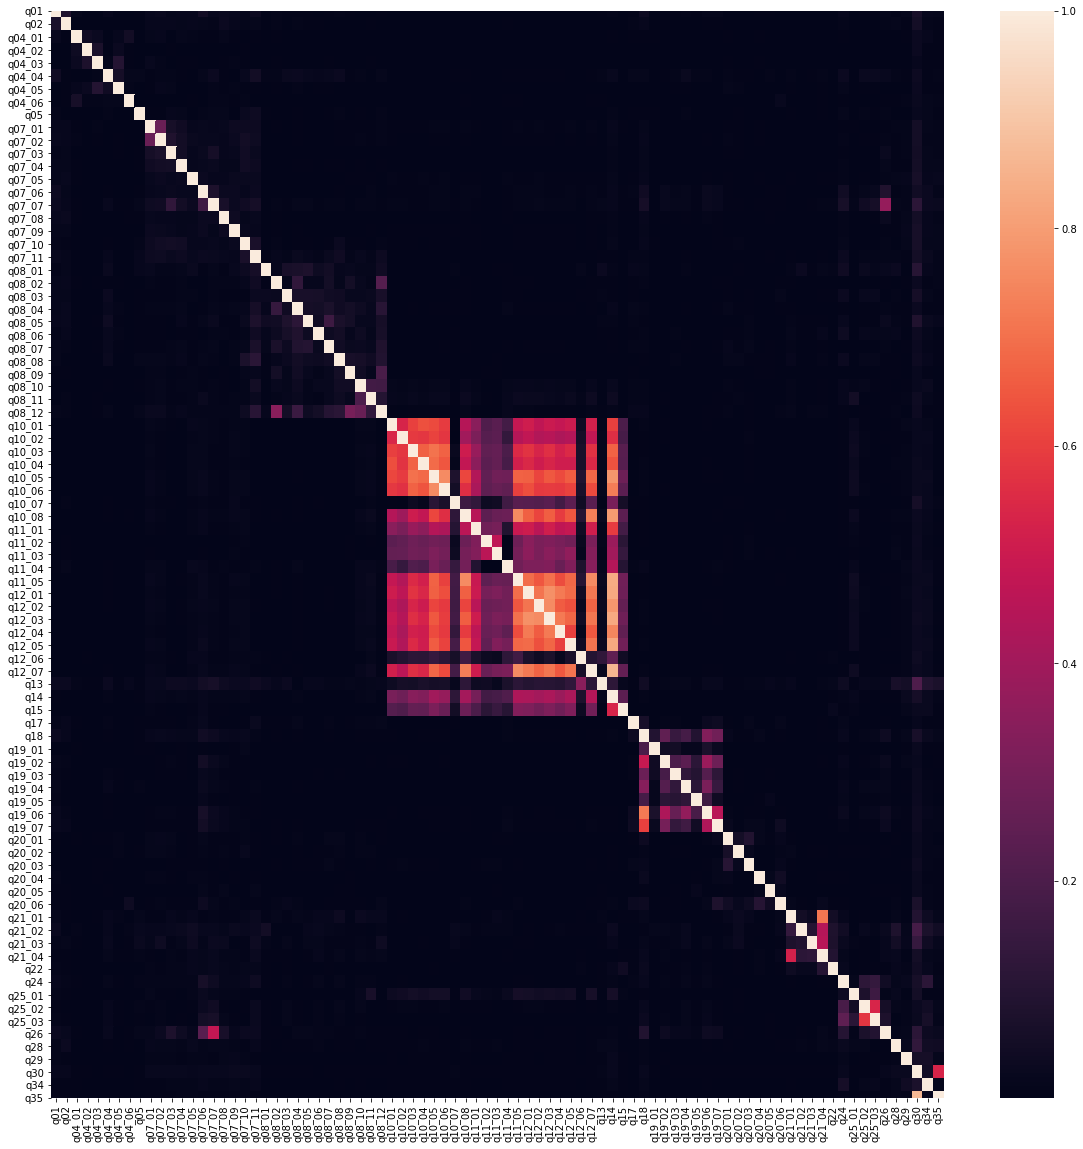

In [7]:
"""
This code snippet is a modified version of the code included in a notebook posted on Kaggle : "Alone in the woods: Using Theil's U for survival"
(https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival)

All credits go to Shaked Zychlinski.
"""

data = response_cleaned[response_cleaned.columns[response_cleaned.columns.str.startswith(r"q")]]
theilu = pd.DataFrame(index=data.columns, columns=data.columns)
columns = data.columns
for i in range(0, len(columns)):
    for j in range(0, len(columns)):
        u = theil_u(data.iloc[:, i].tolist(), data.iloc[:, j].tolist())
        theilu.iloc[i, j] = u
theilu.fillna(value=np.nan, inplace=True)
plt.figure(figsize=(20, 20))
sns.heatmap(theilu, fmt='.2f')
plt.show()

We can now explore the relationships between responses more easily with this heatmap as our guide. <br>
Remember that the colors represent how precisely column values predict row values. <br>

In [8]:
theilu.head()

,q01,q02,q04_01,q04_02,q04_03,q04_04,q04_05,q04_06,q05,q07_01,...,q24,q25_01,q25_02,q25_03,q26,q28,q29,q30,q34,q35
q01,1.000000,0.085909,0.011759,0.002117,0.001301,0.018856,0.001624,0.001668,0.007386,0.023072,...,0.018210,0.003551,0.004515,0.007061,0.014765,0.006433,0.013022,0.065068,0.016297,0.013767
q02,0.068149,1.000000,0.003590,0.001545,0.001328,0.001556,0.003488,0.002671,0.001162,0.017286,...,0.008342,0.001632,0.001554,0.002412,0.008618,0.014971,0.007343,0.050897,0.010959,0.007724
q04_01,0.019542,0.007520,1.000000,0.041869,0.029411,0.000088,0.016451,0.049238,0.000133,0.013463,...,0.007593,0.000474,0.001503,0.003222,0.003851,0.003595,0.006799,0.029680,0.016712,0.006776
q04_02,0.003240,0.002981,0.038553,1.000000,0.073626,0.000006,0.029302,0.007353,0.000143,0.002977,...,0.001951,0.000225,0.000125,0.000035,0.000714,0.001321,0.002477,0.030096,0.004906,0.003933
q04_03,0.002078,0.002675,0.028264,0.076839,1.000000,0.008615,0.095778,0.006954,0.000021,0.022158,...,0.001360,0.002561,0.000163,0.000838,0.001535,0.000640,0.000621,0.019306,0.005303,0.006711


## Finding 1. If men are more aware of **MeToo** movement, they feel more strongly that **Men do not make more money**

`q14` is a single-select question : _AMONG EMPLOYED: How much have you heard about the #MeToo movement?_ <br>

`q10` is a multiple-select question : _AMONG EMPLOYED: In which of the following ways would you say it?s an advantage to be a man at your work right now? (Select all that apply)._<br>
`q10_01` is a choice under `q10` that denotes whether the respondent believes that _Men make more money_

Below is Theil's U on how well `q14` predicts `q10_01`.

In [9]:
theilu.loc['q10_01', 'q14']

0.6029683190015015

This is an unexpectedly high value. <br>
Let's make a `seaborn.catplot` to visualize their relationship.

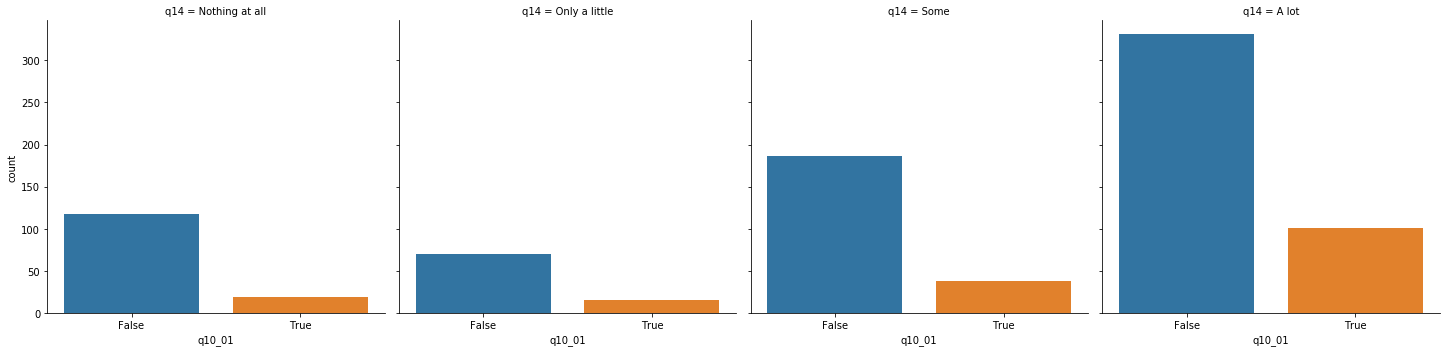

In [10]:
sns.catplot(x="q10_01", kind="count", col='q14', data=response_cleaned)

The plot shows that although men generally do not feel that men make more money, <br>
knowledge about _MeToo_ movement reinforces their belief further.

## Finding 2. Men's **self-consciousness** about masculinity has little connection with their **gender self-concept**

`q01` is a question : _In general, how masculine or "manly" do you feel?_ <br>
`q02` is a queston : _How important is it to you that others see you as masculine?_

`q02` was expected to predict `q01` because you would generally expect someone to push themselves to be more masculine if he is conscious of it. <br>
It turns out `q02` does not predict `q01` at all and vice versa.

Below is Theil's U on how precisely `q02` predicts `q01`

In [11]:
theilu.loc['q01', 'q02']

0.08590921791487896

The value is significantly lower than expected. <br>
To confirm the result, let's see how `q02` responses map to `q01` responses below

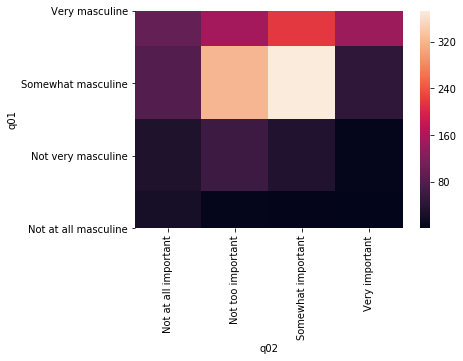

In [12]:
q01_q02 = pd.crosstab(response_cleaned['q01'], response_cleaned['q02'])

sns.heatmap(q01_q02.sort_index(ascending=False))

Despite the high number of respondents deeming masculinity important and feeling somewhat masculine, we cannot really find a linear pattern between `q01` responses and `q02` responses. <br>
Below is `seaborn.countplot` that further confirms our finding.

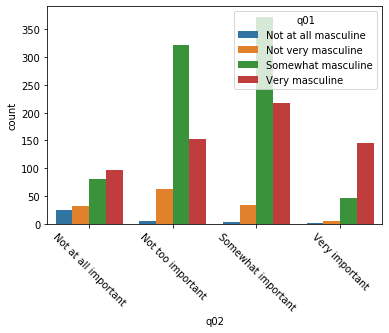

In [13]:
sns.countplot(x='q02', hue='q01', data=response_cleaned)
plt.xticks(rotation=315)
plt.show()

It's interesting how the number of respondents feeling `Somewhat masculine` suddenly drops when they believe masculinity is `very important`. <br>
But we still cannot find any correlation between `q01` and `q02`.

# References

[1] Zychlinski, Shaked "Alone in the woods: Using Theil's U for survival" Kaggle. Feb 3rd, 2018. Accessed January 9th, 2020. https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival